In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

##### Import the generated csv files as pandas dataframes

In [2]:
overview_df = pd.read_csv("../csv/overview_df.csv", index_col=0)
detailed_df = pd.read_csv("../csv/detailed_df.csv", index_col=[0,1])
display(overview_df)

,distance_matrix_names,crossover_functions,mutation_functions,replacement_functions,mutation_rates,crossover_rates,tournament_rates,population_sizes,LowestCost,HighestCost,AvgCost
0,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,25,3816.2,3816.2,3816.2000
1,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,100,3573.3,3573.3,3573.3000
2,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,500,3452.5,3452.5,3452.5000
3,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.15,25,3666.2,3666.2,3666.2000
4,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.15,100,3501.7,3501.7,3501.7000
...,...,...,...,...,...,...,...,...,...,...,...
1291,../xml/brazil58.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.15,100,37919.5,44411.7,40004.8360
1292,../xml/brazil58.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.15,500,37224.0,143931.8,101709.0522
1293,../xml/brazil58.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.50,25,36227.8,36907.1,36486.3000
1294,../xml/brazil58.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.50,100,36040.9,40773.5,37754.8790


##### Add Convergence column to the overview dataframes

In [3]:
merged_df = detailed_df.merge(overview_df, left_on=detailed_df.index.get_level_values(0), right_index=True)
merged_burma = merged_df[merged_df["distance_matrix_names"].str.contains("burma")]
merged_brazil = merged_df[merged_df["distance_matrix_names"].str.contains("brazil")]

In [4]:
lowest_cost = merged_df.groupby(merged_df.index.get_level_values(0))["AvgCost_x"].min()
highest_cost = merged_df.groupby(merged_df.index.get_level_values(0))["AvgCost_x"].max()
costs = pd.concat([lowest_cost, highest_cost], axis=1)
costs.columns=["lowest_average_cost","highest_average_cost"]
print(costs)
merged_df.drop(columns="key_0", inplace=True)
merged_df = merged_df.merge(costs, left_on=detailed_df.index.get_level_values(0), right_index= True)

            lowest_average_cost  highest_average_cost
Experiment                                           
0                     3816.2000             6684.4200
1                     3573.3000             6670.3030
2                     3452.5000             6665.0056
3                     3666.2000             6689.5720
4                     3501.7000             6640.5070
...                         ...                   ...
1291                 40004.8360           123523.9450
1292                101709.0522           123598.1306
1293                 36486.3000           123820.7560
1294                 37754.8790           123496.0740
1295                 99593.6508           123702.8950

[1296 rows x 2 columns]


In [5]:
#merged_df["convergence"] = (merged_df["highest_average_cost"] - merged_df["AvgCost_x"]) >=  0.8*(merged_df["highest_average_cost"] - merged_df["lowest_average_cost"])
merged_df["convergence"] = merged_df["AvgCost_x"] <=  1.1*merged_df["lowest_average_cost"]
display(merged_df)


key_0  LowestCost_x  HighestCost_x   AvgCost_x  \
Experiment Iteration                                                   
0          0              0        5301.1         8030.1   6684.4200   
           1              0        5301.1         7625.4   6592.7800   
           2              0        5301.1         7367.1   6518.8560   
           3              0        5284.1         7213.0   6447.4280   
           4              0        5284.1         7127.1   6390.5080   
...                     ...           ...            ...         ...   
1295       9995        1295       35250.5       142978.0  99608.0272   
           9996        1295       35250.5       142978.0  99607.9498   
           9997        1295       35250.5       142978.0  99607.8386   
           9998        1295       35250.5       142978.0  99607.6862   
           9999        1295       35250.5       142978.0  99593.6508   

                     distance_matrix_names crossover_functions  \
Experiment Iteration                                             
0          0            ../xml/burma14.xml        PmxCrossover   
           1            ../xml/burma14.xml        PmxCrossover   
           2            ../xml/burma14.xml        PmxCrossover   
           3            ../xml/burma14.xml        PmxCrossover   
           4            ../xml/burma14.xml        PmxCrossover   
...                                    ...                 ...   
1295       9995        ../xml/brazil58.xml    CrossoverWithFix   
           9996        ../xml/brazil58.xml    CrossoverWithFix   
           9997        ../xml/brazil58.xml    CrossoverWithFix   
           9998        ../xml/brazil58.xml    CrossoverWithFix   
           9999        ../xml/brazil58.xml    CrossoverWithFix   

                     mutation_functions replacement_functions  mutation_rates  \
Experiment Iteration                                                            
0          0               SwapMutation        ReplaceWeakest            0.15   
           1               SwapMutation        ReplaceWeakest            0.15   
           2               SwapMutation        ReplaceWeakest            0.15   
           3               SwapMutation        ReplaceWeakest            0.15   
           4               SwapMutation        ReplaceWeakest            0.15   
...                                 ...                   ...             ...   
1295       9995          InsertMutation   ReplaceFirstWeakest            0.50   
           9996          InsertMutation   ReplaceFirstWeakest            0.50   
           9997          InsertMutation   ReplaceFirstWeakest            0.50   
           9998          InsertMutation   ReplaceFirstWeakest            0.50   
           9999          InsertMutation   ReplaceFirstWeakest            0.50   

                      crossover_rates  tournament_rates  population_sizes  \
Experiment Iteration                                                        
0          0                      0.3              0.05                25   
           1                      0.3              0.05                25   
           2                      0.3              0.05                25   
           3                      0.3              0.05                25   
           4                      0.3              0.05                25   
...                               ...               ...               ...   
1295       9995                   0.8              0.50               500   
           9996                   0.8              0.50               500   
           9997                   0.8              0.50               500   
           9998                   0.8              0.50               500   
           9999                   0.8              0.50               500   

                      LowestCost_y  HighestCost_y   AvgCost_y  \
Experiment Iteration                                            
0          0                3816.2      

In [6]:
merged_df_convergeing = merged_df[merged_df["convergence"] == True]
merged_df_convergeing = merged_df_convergeing.reset_index(level='Iteration')
covergence_iterations = merged_df_convergeing.groupby(merged_df_convergeing.index.get_level_values(0))["Iteration"].first()
display(covergence_iterations)

overview_df["convergence"] = covergence_iterations
display(overview_df)

Experiment
0        309
1        291
2        489
3        496
4        446
        ... 
1291    7519
1292    4306
1293    3579
1294    6967
1295    5111
Name: Iteration, Length: 1296, dtype: int64

,distance_matrix_names,crossover_functions,mutation_functions,replacement_functions,mutation_rates,crossover_rates,tournament_rates,population_sizes,LowestCost,HighestCost,AvgCost,convergence
0,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,25,3816.2,3816.2,3816.2000,309
1,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,100,3573.3,3573.3,3573.3000,291
2,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,500,3452.5,3452.5,3452.5000,489
3,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.15,25,3666.2,3666.2,3666.2000,496
4,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.15,100,3501.7,3501.7,3501.7000,446
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,../xml/brazil58.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.15,100,37919.5,44411.7,40004.8360,7519
1292,../xml/brazil58.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.15,500,37224.0,143931.8,101709.0522,4306
1293,../xml/brazil58.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.50,25,36227.8,36907.1,36486.3000,3579
1294,../xml/brazil58.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.50,100,36040.9,40773.5,37754.8790,6967


## Analyse Burma and Brazil

In [7]:
overview_burma = overview_df[overview_df["distance_matrix_names"].str.contains("burma")]
overview_brazil = overview_df[overview_df["distance_matrix_names"].str.contains("brazil")]

##### Get best and worst cost

Notes: Don't take just the best solutions but the top x percent. Then one might find where the best solutions originate from. Example: best solution in brazil was with population size 25. But maybe close by there is a value that has population size 100.

##### Show histogram of lowest cost for Burma and Brazil

Burma =  3323.0 , 3978.8
Brazil =  26781.2 , 52537.5


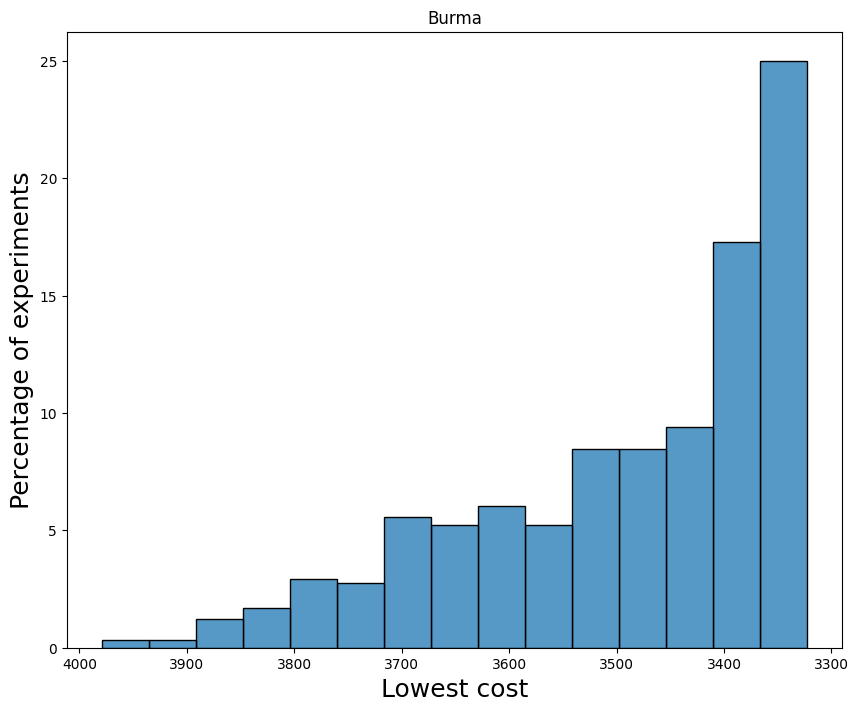

Text(0, 0.5, 'Percentage of experiments')

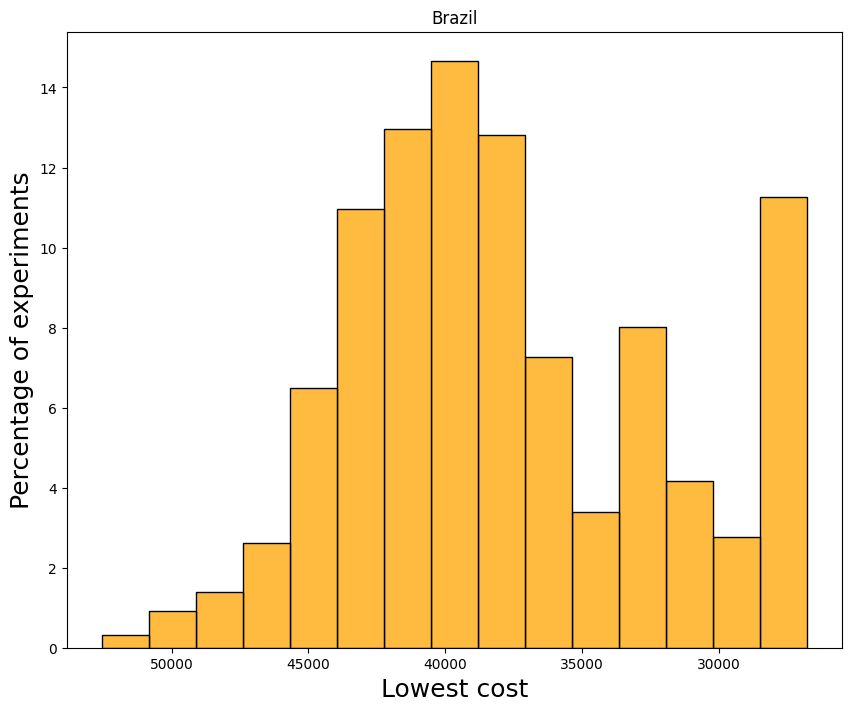

In [10]:
print("Burma = ",overview_burma["LowestCost"].min(),",",overview_burma["LowestCost"].max())
print("Brazil = ",overview_brazil["LowestCost"].min(),",",overview_brazil["LowestCost"].max())
plt.rcParams['figure.figsize'] = [10, 8]
sns.histplot(
    data=overview_burma,
    x='LowestCost',
    discrete=False,
    stat='percent',
    bins=15
)
plt.gca().invert_xaxis()
plt.title("Burma")
plt.xlabel("Lowest cost",fontsize="18")
plt.ylabel("Percentage of experiments",fontsize="18")
plt.show()

sns.histplot(
    data=overview_brazil,
    x='LowestCost',
    discrete=False,
    stat='percent',
    color="orange",
    bins=15
)
plt.gca().invert_xaxis()
plt.title("Brazil")
plt.xlabel("Lowest cost", fontsize="18")
plt.ylabel("Percentage of experiments",fontsize="18")

a lot of solutions fall into the local optimum around a cost of 40000

##### Heatmaps
There are 7 parameters that were changed during the experiments. Namely:

    - crossover_functions
    - mutation_functions
    - replacement_functions
    - mutation_rates
    - crossover_rates
    - tournament_rates
    - population_sizes

The aim of this section is to identify how changing a single parameter affects the average performance of the runs within the experiments.
The results will then be put in a table were the row indicates the varied parameter and the column indicates it's value. Because different parameters have different values, a columns value depends on the parameter that is considered at the moment. If the change in performance related to the choice of a particular value for a parameter is independent from other parameters chosen, this would mean that one acquires the best solution by combining parameters according to the columns that yield the best performance.

In [11]:
#get values for each parameter
parameter_dict = {
                "crossover_functions" : overview_burma["crossover_functions"].unique(),
                "mutation_functions" : overview_burma["mutation_functions"].unique(),
                "replacement_functions" : overview_burma["replacement_functions"].unique(),
                "mutation_rates" : overview_burma["mutation_rates"].unique(),
                "crossover_rates" : overview_burma["crossover_rates"].unique(),
                "tournament_rates" : overview_burma["tournament_rates"].unique(),
                "population_sizes" : overview_burma["population_sizes"].unique()
                }
print(parameter_dict)

{'crossover_functions': array(['PmxCrossover', 'OrderCrossover', 'CrossoverWithFix'], dtype=object), 'mutation_functions': array(['SwapMutation', 'InversionMutation', 'InsertMutation'],
      dtype=object), 'replacement_functions': array(['ReplaceWeakest', 'ReplaceFirstWeakest'], dtype=object), 'mutation_rates': array([0.15, 0.5 ]), 'crossover_rates': array([0.3, 0.8]), 'tournament_rates': array([0.05, 0.15, 0.5 ]), 'population_sizes': array([ 25, 100, 500])}


In [52]:
def get_cost_dict(df,column_name):
    cost_dict = {}
    for key,values in parameter_dict.items():
        average_costs = []
        for value in values:
            average_costs.append(df[column_name][df[key] == value].mean())
        cost_dict[key] = average_costs
    return cost_dict

cost_dict_burma = get_cost_dict(overview_burma, "LowestCost")
cost_dict_brazil = get_cost_dict(overview_brazil, "LowestCost")

convergence_dict_burma = get_cost_dict(overview_burma, "convergence")
convergence_dict_brazil = get_cost_dict(overview_brazil, "convergence")



In [53]:
def prepare_heatmap(cost_dict):
    values = list(cost_dict.values())
    max_length = max([len(x) for x in values])
    padded_values = np.zeros(shape=(len(values),max_length))
    for row in range(len(values)):
        for column in range(len(values[row])):
            padded_values[row,column] = values[row][column]

    padded_values[padded_values == 0] = np.NaN
    df = pd.DataFrame(padded_values, index=list(cost_dict.keys()))
    normalized = (1 - df.div(df.max(axis=1), axis=0))*100
    #normalized = (1 - (df - df.min())/((df - df.min()).max()))*100
    return normalized, df

normalized_burma, heatmap_data_burma = prepare_heatmap(cost_dict_burma)
normalized_brazil, heatmap_data_brazil = prepare_heatmap(cost_dict_brazil)

normalized_burma_conv, heatmap_burma_conv = prepare_heatmap(convergence_dict_burma)
normalized_brazil_conv, heatmap_brazil_conv = prepare_heatmap(convergence_dict_brazil)

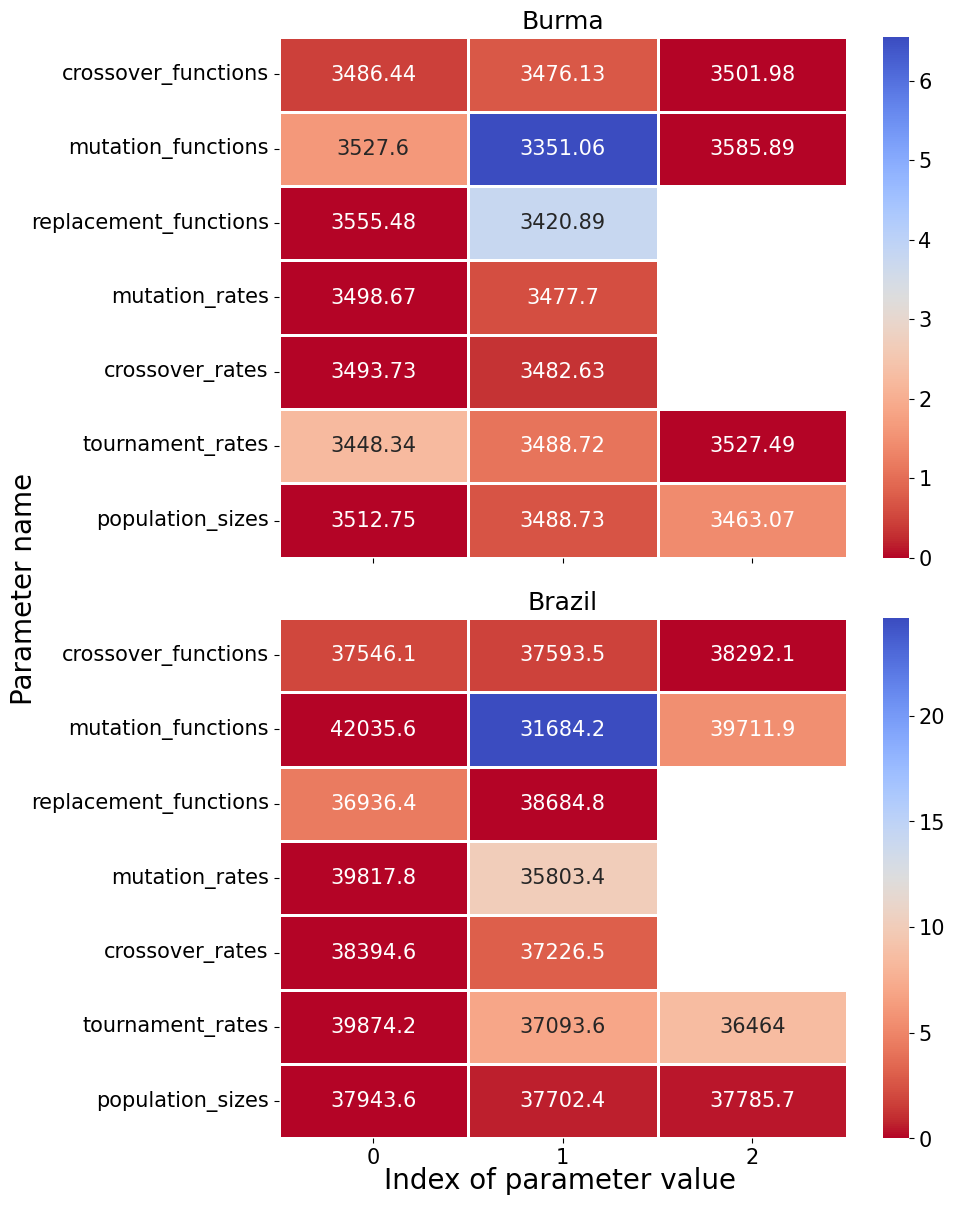

In [54]:
#parameter cost heatmaps
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.heatmap(normalized_burma, cmap="coolwarm_r", annot=heatmap_data_burma, fmt="g", linewidths=1, annot_kws={'size': 15}, ax= ax[0])
sns.heatmap(normalized_brazil, cmap="coolwarm_r", annot=heatmap_data_brazil, fmt="g", linewidths=1, annot_kws={'size': 15}, ax= ax[1])
ax[0].set_title("Burma")
ax[1].set_title("Brazil")
plt.rcParams['figure.figsize'] = [10, 12]
plt.rcParams.update({'font.size': 15})
fig.tight_layout(pad=5.0)
fig.text(0.55, 0, 'Index of parameter value', ha='center', fontdict={'size': 20})
fig.text(0, 0.5, 'Parameter name', va='center', rotation='vertical', fontdict={'size': 20})
fig.tight_layout(pad=1.0)
plt.show()

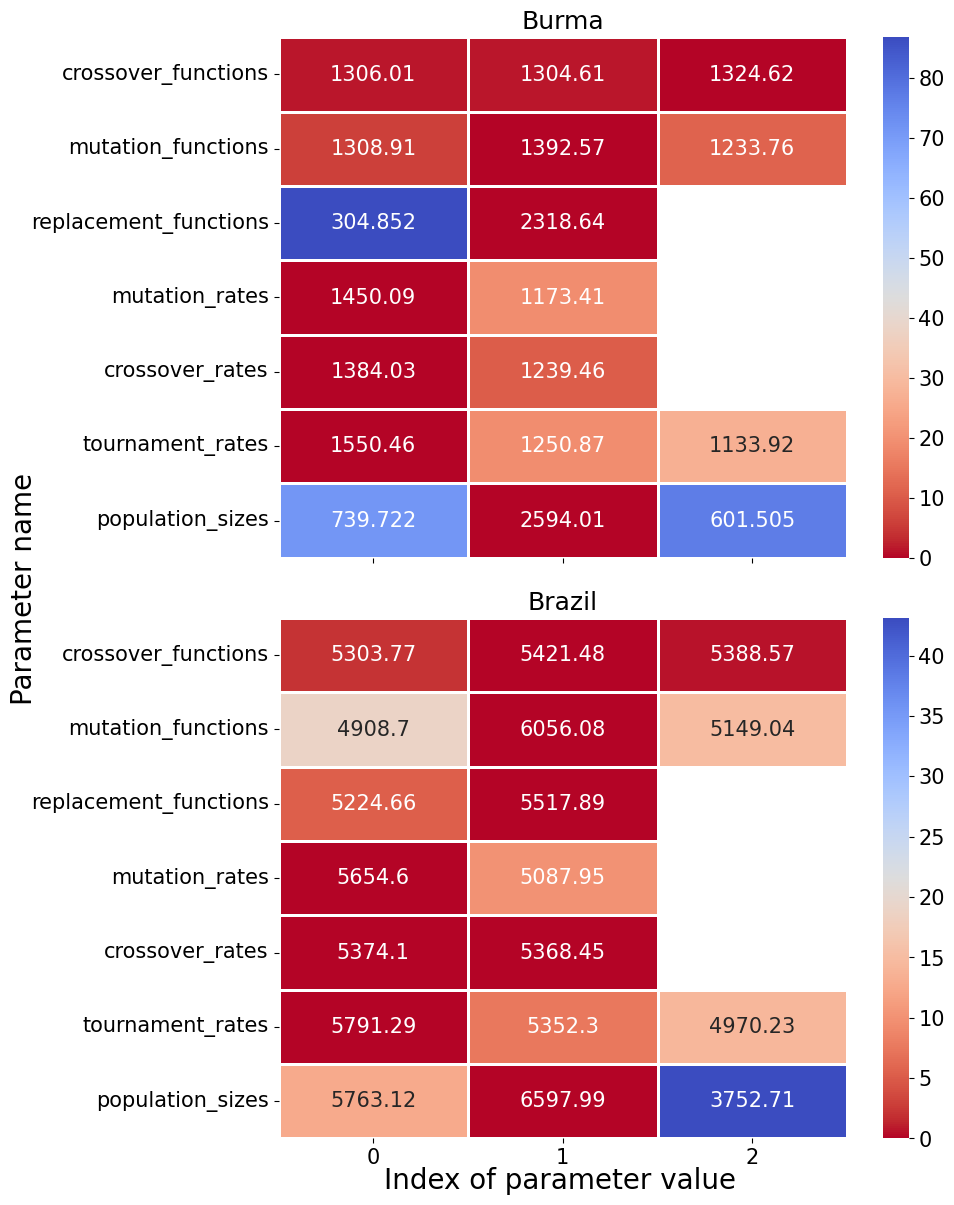

In [55]:
#parameter convergence heatmaps
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.heatmap(normalized_burma_conv, cmap="coolwarm_r", annot=heatmap_burma_conv, fmt="g", linewidths=1, annot_kws={'size': 15}, ax= ax[0])
sns.heatmap(normalized_brazil_conv, cmap="coolwarm_r", annot=heatmap_brazil_conv, fmt="g", linewidths=1, annot_kws={'size': 15}, ax= ax[1])
ax[0].set_title("Burma")
ax[1].set_title("Brazil")
plt.rcParams['figure.figsize'] = [10, 12]
plt.rcParams.update({'font.size': 15})
fig.tight_layout(pad=5.0)
fig.text(0.55, 0, 'Index of parameter value', ha='center', fontdict={'size': 20})
fig.text(0, 0.5, 'Parameter name', va='center', rotation='vertical', fontdict={'size': 20})
fig.tight_layout(pad=1.0)
plt.show()

In [75]:
#test for burma
df = overview_burma
display(df[
      (df["crossover_functions"] == "OrderCrossover")
    & (df["mutation_functions"] == "SwapMutation")
    & (df["replacement_functions"] == "ReplaceFirstWeakest") 
    & (df["mutation_rates"] == 0.5) 
    & (df["crossover_rates"] == 0.8) 
    & (df["tournament_rates"]==0.05) 
    & (df["population_sizes"] == 500)])

#test for brazil
df = overview_brazil
display(df[
      (df["crossover_functions"] == "PmxCrossover")
    & (df["mutation_functions"] == "InversionMutation")
    & (df["replacement_functions"] == "ReplaceWeakest") 
    & (df["mutation_rates"] == 0.5) 
    & (df["crossover_rates"] == 0.3) 
    & (df["tournament_rates"]==0.5) 
    & (df["population_sizes"] == 500)])

,distance_matrix_names,crossover_functions,mutation_functions,replacement_functions,mutation_rates,crossover_rates,tournament_rates,population_sizes,LowestCost,HighestCost,AvgCost,convergence
281,../xml/burma14.xml,OrderCrossover,SwapMutation,ReplaceFirstWeakest,0.5,0.8,0.05,500,3413.9,8456.6,5692.1114,1972


,distance_matrix_names,crossover_functions,mutation_functions,replacement_functions,mutation_rates,crossover_rates,tournament_rates,population_sizes,LowestCost,HighestCost,AvgCost,convergence
746,../xml/brazil58.xml,PmxCrossover,InversionMutation,ReplaceWeakest,0.5,0.3,0.5,500,27299.0,27403.5,27379.9182,5169


The colorbar shows how much better the value of the current cell is compared to the worst one of the corresponding row. Numbers are given in percent

##### Barplot convergence and average lowest cost

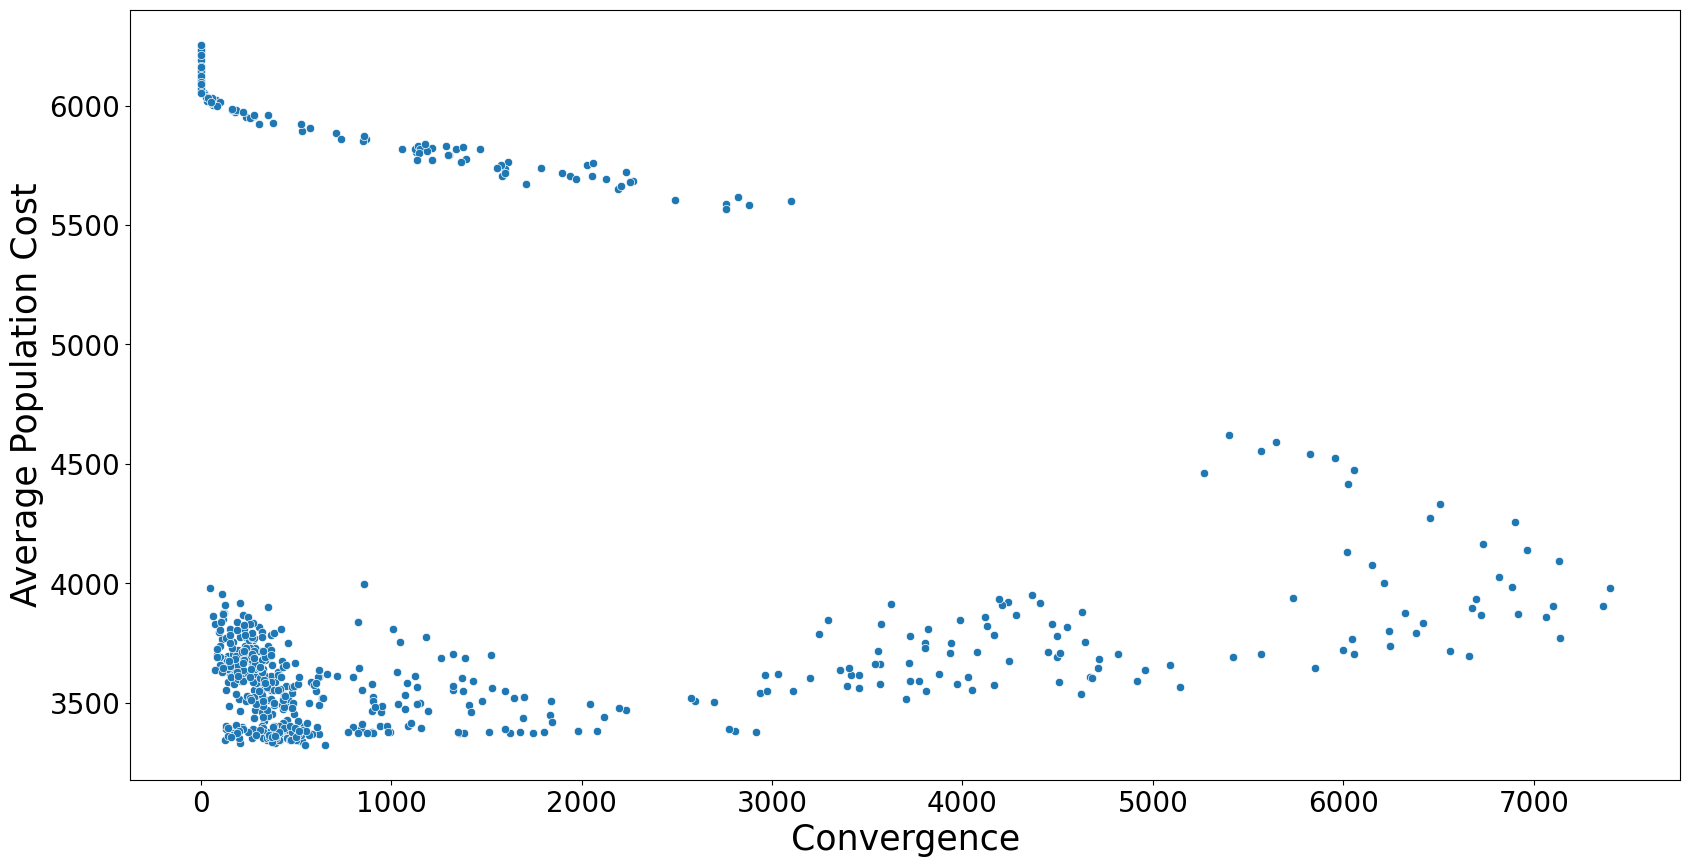

In [43]:
sns.scatterplot(data=overview_burma,x="convergence",y="AvgCost")
plt.xlabel("Convergence", fontsize="25")
plt.ylabel("Average Population Cost", fontsize="25")
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.rcParams['figure.figsize'] = [20, 10]

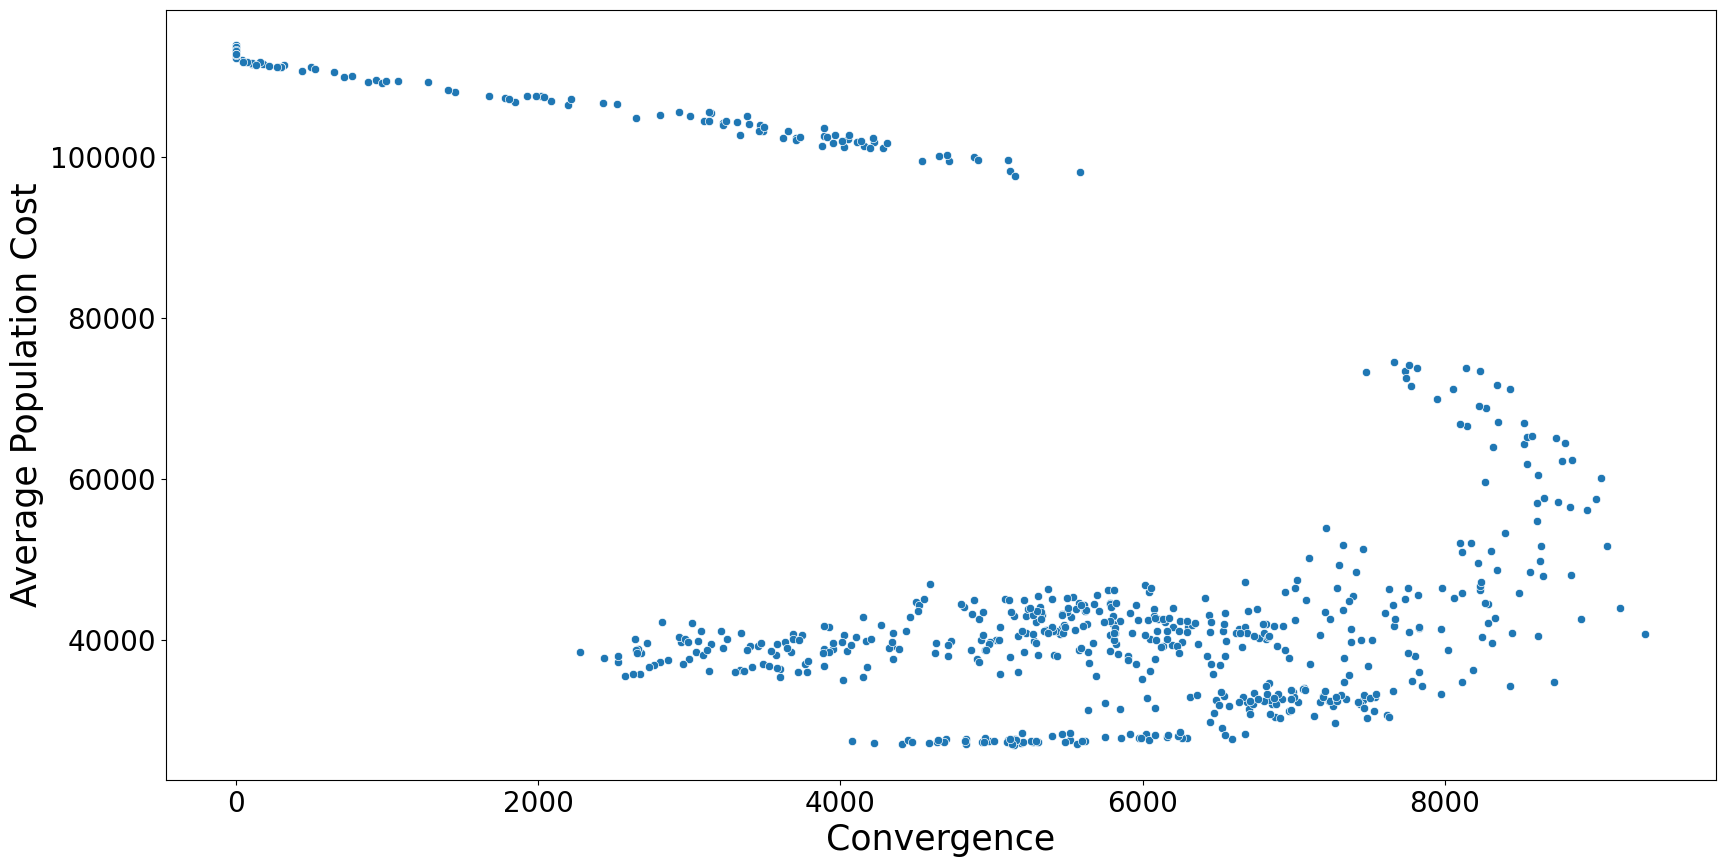

In [45]:
sns.scatterplot(data=overview_brazil,x="convergence",y="AvgCost")
plt.xlabel("Convergence", fontsize="25")
plt.ylabel("Average Population Cost", fontsize="25")
plt.gca().tick_params(axis='both', which='major', labelsize=20)

##### Bar charts for best solutions

In [188]:
# retrieve best solutions for both cities. For Burma these are the ones reaching the optimum solution of 3323, for Brazil we'll take the best 5%
display("Absolute best configuration Brazil: ", overview_brazil[overview_brazil["LowestCost"] == overview_brazil["LowestCost"].min()])
best_burma = overview_burma[overview_burma["LowestCost"] == 3323]
brazil_10_percent_cost = overview_brazil["LowestCost"].quantile(q=0.10)
print("Brazil best 10 percent cost: ",overview_brazil["LowestCost"].min(),", ",brazil_10_percent_cost)
best_brazil = overview_brazil[overview_brazil["LowestCost"] <= brazil_10_percent_cost]

display(best_burma)
display(best_brazil)

'Absolute best configuration Brazil: '

,distance_matrix_names,crossover_functions,mutation_functions,replacement_functions,mutation_rates,crossover_rates,tournament_rates,population_sizes,LowestCost,HighestCost,AvgCost,convergence
789,../xml/brazil58.xml,PmxCrossover,InversionMutation,ReplaceFirstWeakest,0.5,0.8,0.5,25,26781.2,27854.5,27261.156,5271


Brazil best 10 percent cost:  26781.2 ,  28041.44


,distance_matrix_names,crossover_functions,mutation_functions,replacement_functions,mutation_rates,crossover_rates,tournament_rates,population_sizes,LowestCost,HighestCost,AvgCost,convergence
108,../xml/burma14.xml,PmxCrossover,InversionMutation,ReplaceFirstWeakest,0.15,0.3,0.05,25,3323.0,3426.2,3378.5000,2916
109,../xml/burma14.xml,PmxCrossover,InversionMutation,ReplaceFirstWeakest,0.15,0.3,0.05,100,3323.0,4378.1,3697.7560,6660
110,../xml/burma14.xml,PmxCrossover,InversionMutation,ReplaceFirstWeakest,0.15,0.3,0.05,500,3323.0,8623.9,6023.1678,80
111,../xml/burma14.xml,PmxCrossover,InversionMutation,ReplaceFirstWeakest,0.15,0.3,0.15,25,3323.0,3418.9,3374.3440,1355
113,../xml/burma14.xml,PmxCrossover,InversionMutation,ReplaceFirstWeakest,0.15,0.3,0.15,500,3323.0,8583.9,5983.4126,188
...,...,...,...,...,...,...,...,...,...,...,...,...
568,../xml/burma14.xml,CrossoverWithFix,InversionMutation,ReplaceFirstWeakest,0.50,0.8,0.05,100,3323.0,3849.2,3554.6660,4052
569,../xml/burma14.xml,CrossoverWithFix,InversionMutation,ReplaceFirstWeakest,0.50,0.8,0.05,500,3323.0,8584.3,5618.5642,2822
570,../xml/burma14.xml,CrossoverWithFix,InversionMutation,ReplaceFirstWeakest,0.50,0.8,0.15,25,3323.0,3416.6,3375.3920,828
572,../xml/burma14.xml,CrossoverWithFix,InversionMutation,ReplaceFirstWeakest,0.50,0.8,0.15,500,3323.0,8519.4,5606.0146,2491


,distance_matrix_names,crossover_functions,mutation_functions,replacement_functions,mutation_rates,crossover_rates,tournament_rates,population_sizes,LowestCost,HighestCost,AvgCost,convergence
739,../xml/brazil58.xml,PmxCrossover,InversionMutation,ReplaceWeakest,0.5,0.3,0.05,100,27490.6,27591.7,27577.9500,6044
740,../xml/brazil58.xml,PmxCrossover,InversionMutation,ReplaceWeakest,0.5,0.3,0.05,500,28030.1,28325.0,28229.1836,6081
741,../xml/brazil58.xml,PmxCrossover,InversionMutation,ReplaceWeakest,0.5,0.3,0.15,25,27515.4,27515.4,27515.4000,5517
742,../xml/brazil58.xml,PmxCrossover,InversionMutation,ReplaceWeakest,0.5,0.3,0.15,100,27536.3,27537.4,27537.3890,5106
743,../xml/brazil58.xml,PmxCrossover,InversionMutation,ReplaceWeakest,0.5,0.3,0.15,500,27264.6,27480.0,27380.9702,5620
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,../xml/brazil58.xml,CrossoverWithFix,InversionMutation,ReplaceFirstWeakest,0.5,0.3,0.50,100,27246.6,34755.2,30318.3670,7485
1214,../xml/brazil58.xml,CrossoverWithFix,InversionMutation,ReplaceFirstWeakest,0.5,0.3,0.50,500,27339.4,144783.6,100197.8448,4704
1221,../xml/brazil58.xml,CrossoverWithFix,InversionMutation,ReplaceFirstWeakest,0.5,0.8,0.50,25,27490.6,28820.2,28083.4200,5399
1222,../xml/brazil58.xml,CrossoverWithFix,InversionMutation,ReplaceFirstWeakest,0.5,0.8,0.50,100,27522.3,34746.6,30411.2710,7628


In [258]:
#print bar plots function

def print_bar_plots(best_value_frame):
    df = best_value_frame.copy()
    function_columns = ["mutation_functions", "crossover_functions", "replacement_functions"]
    numerical_columns = ["mutation_rates","crossover_rates","tournament_rates","population_sizes"]
    df[numerical_columns] = df[numerical_columns].astype(str)
    for c in numerical_columns:
        prefix = c[0]+": "
        df[c] = df[c].apply(lambda x: prefix + str(x))

    df_melt_1 = pd.melt(df[function_columns], value_vars= function_columns)
    df_melt_2 = pd.melt(df[numerical_columns], value_vars= numerical_columns)

    # Create a combined bar plot
    plt.rcParams['figure.figsize'] = [15, 15]
    fig, ax = plt.subplots(nrows=2)
    sns.countplot(x='value' , hue='variable', data=df_melt_1, palette="Set1", ax=ax[0])
    sns.countplot(y='value', hue='variable', data=df_melt_2, palette="Set1", ax=ax[1])
    ax[0].set_ylabel("Count", fontsize=20)
    ax[1].set_ylabel("Parameter value", fontsize=20)
    ax[0].set_xlabel("Parameter value", fontsize=20)
    ax[1].set_xlabel("Count", fontsize=20)

    ax[0].tick_params(axis='x', which='major', labelsize=15)
    ax[0].tick_params(axis='y', which='major', labelsize=20)
    ax[1].tick_params(axis='both', which='major', labelsize=20)
    plt.show()


Plot for Burma


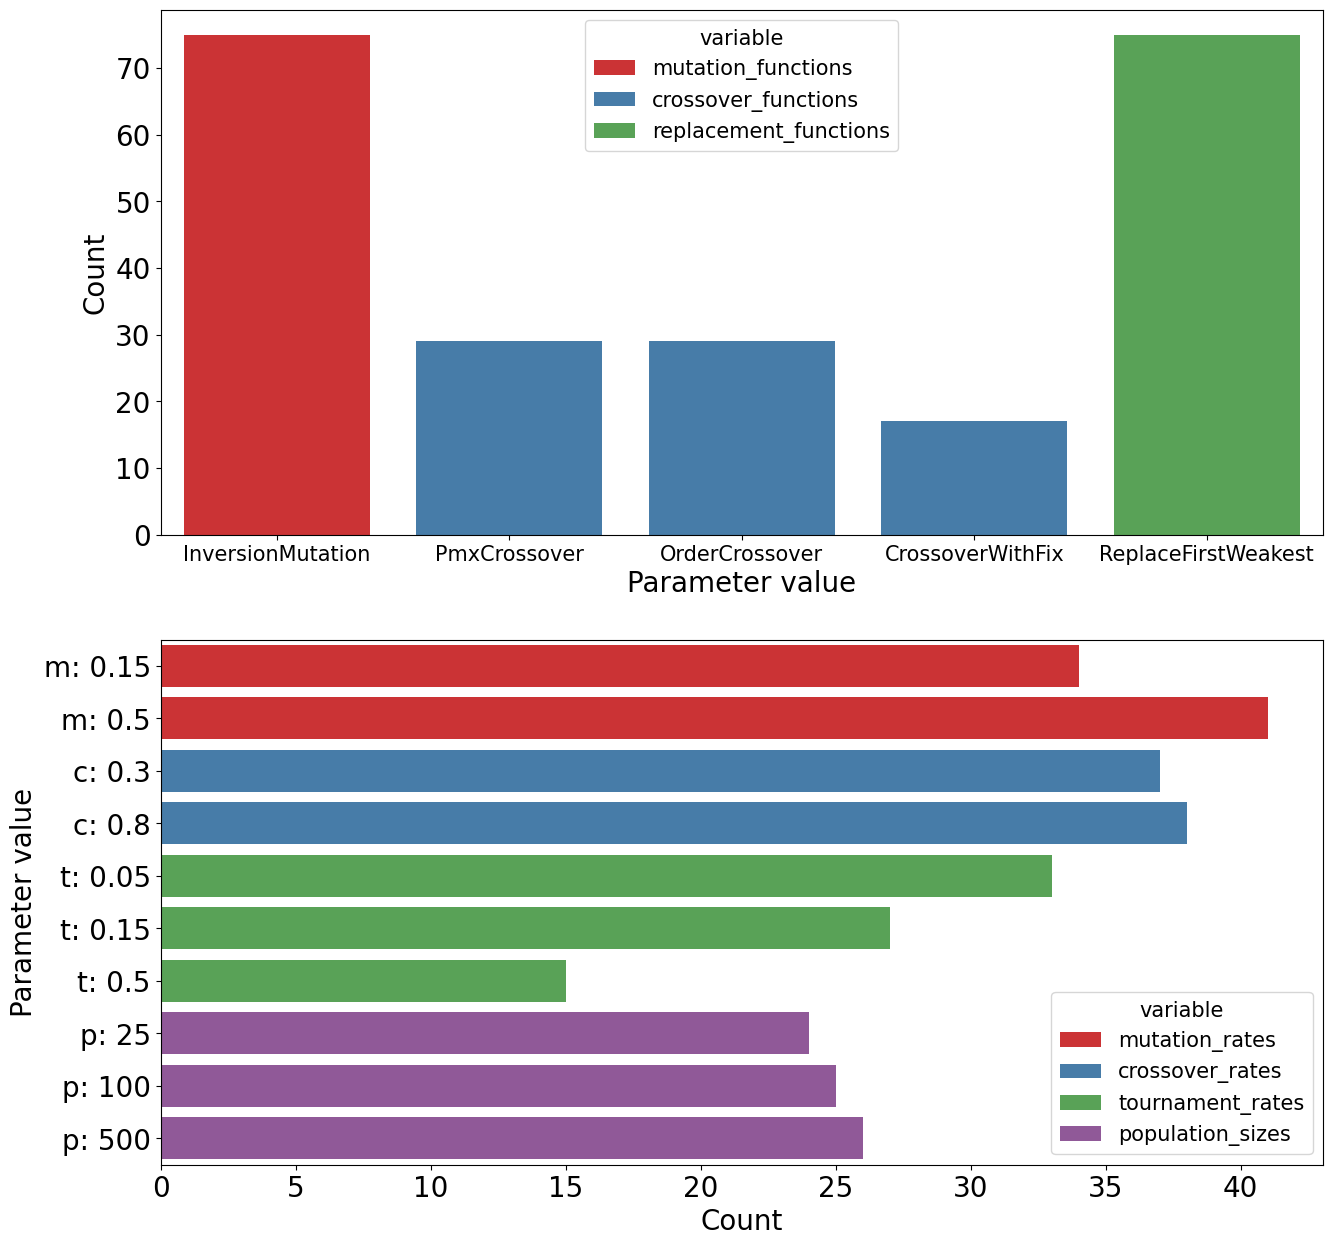

Plot for Brazil


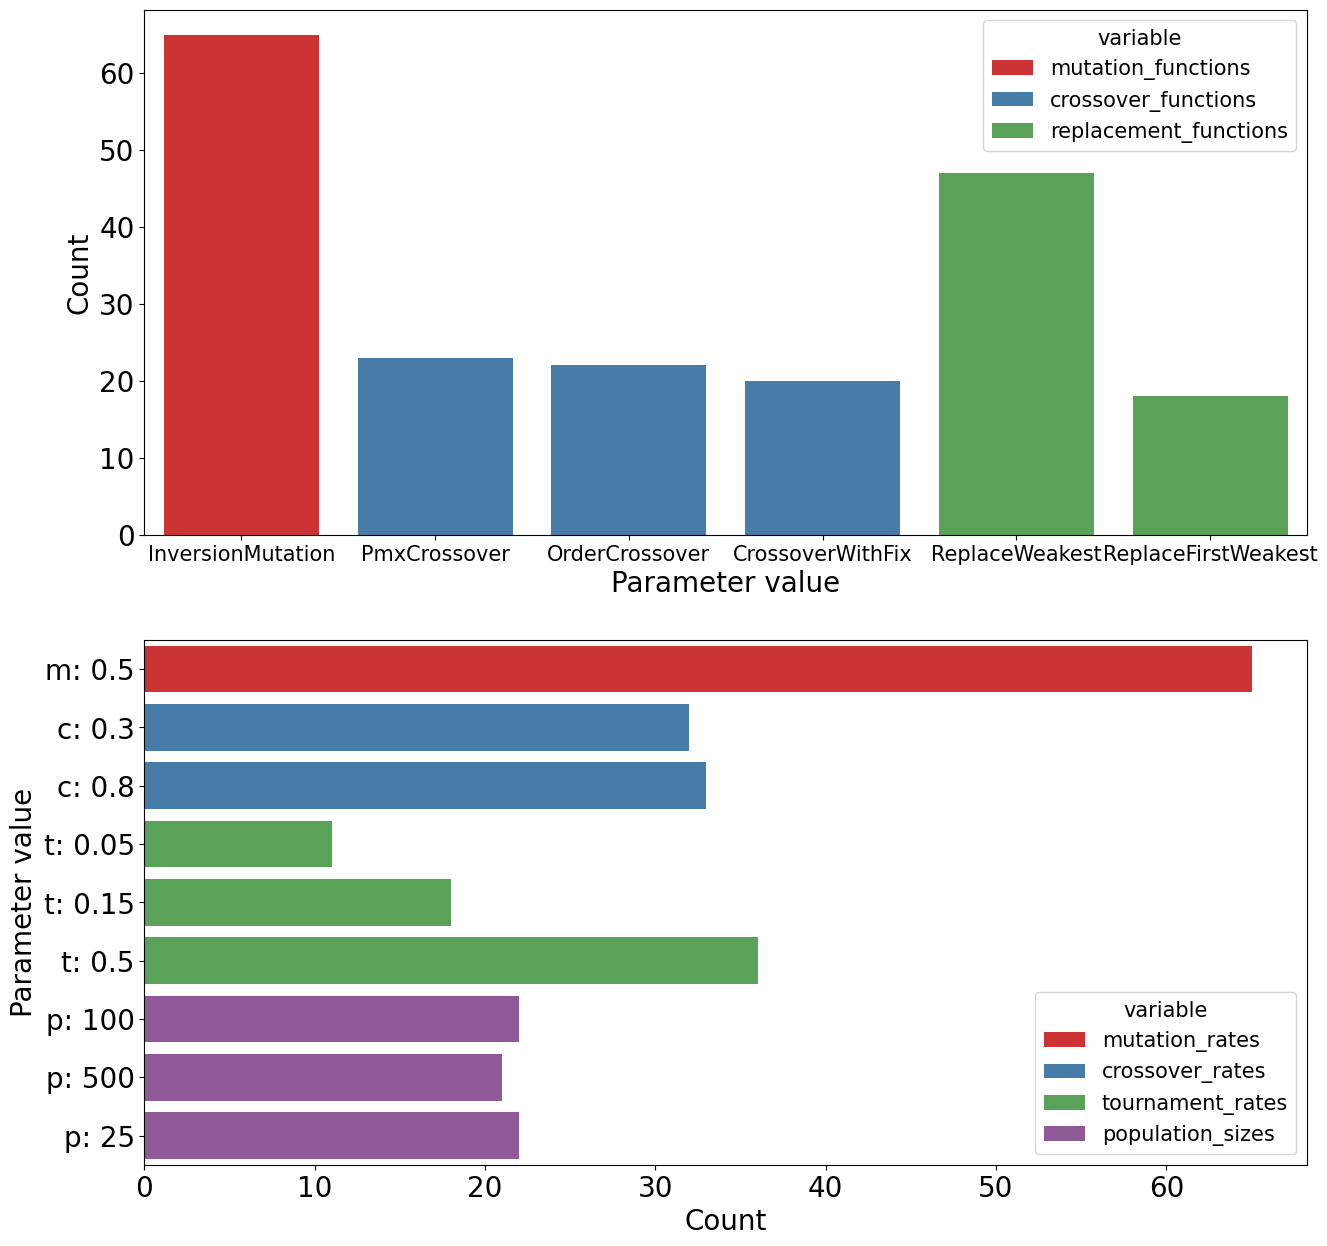

In [259]:
# call barplot function
print("Plot for Burma")
print_bar_plots(best_burma)
print("Plot for Brazil")
print_bar_plots(best_brazil)